In [121]:
# импортируем файл с данными
import numpy as np
import pandas as pd

#universal_bank = pd.read_csv('C:/Users/QUber/Desktop/UniversalBank.csv', index_col = 'ID')
universal_bank = pd.read_csv('C:/Users/anton/OneDrive/Рабочий стол/UniversalBank.csv', index_col = 'ID')

universal_bank

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0


In [122]:
universal_bank [universal_bank.Online == 1][['Age','Online']]

,Age,Online
ID,,
6,37,1
7,53,1
9,35,1
12,29,1
14,59,1
...,...,...
4995,64,1
4996,29,1
4997,30,1


# Проанализируем возрастнуую структуру клиентов банка 

In [123]:
# Найдем численность возрастных группы клиентов 
universal_bank.Age.value_counts(bins=4)

(45.0, 56.0]      1400
(34.0, 45.0]      1396
(22.955, 34.0]    1123
(56.0, 67.0]      1081
Name: Age, dtype: int64

In [124]:
age_groups = pd.DataFrame(universal_bank.Age.value_counts(bins=4).sort_index(ascending=True))
age_groups.index_col = 'interval'
MIN = min(list(universal_bank.Age))
MAX = max(list(universal_bank.Age))
print('возратсные группы:\n', age_groups)
print('самый молодой клиент', MIN)
print('самый старый клиент:', MAX)

возратсные группы:
                  Age
(22.955, 34.0]  1123
(34.0, 45.0]    1396
(45.0, 56.0]    1400
(56.0, 67.0]    1081
самый молодой клиент 23
самый старый клиент: 67


**Мы разделили на клиентов банка на 4 возрастные группы** 

Молодежь -               (23, 34]    - 1123

Средний возраст -        (34, 45]     - 1396

Предпенсионный возраст - (45, 56]     - 1400

Пожилые  -               (56, 67]   -   1081

In [125]:
# датафрейм для разделения по группам
age_gr =pd.DataFrame({'Group': ["Молодежь", "Средний возраст", "Предпенсионный возраст", "Пожилые"], "Age": ["[23, 34]", "(34, 45]", "(45, 56]", "(56, 67]"],"Count": list(age_groups['Age']) })
age_gr

,Group,Age,Count
0,Молодежь,"[23, 34]",1123
1,Средний возраст,"(34, 45]",1396
2,Предпенсионный возраст,"(45, 56]",1400
3,Пожилые,"(56, 67]",1081


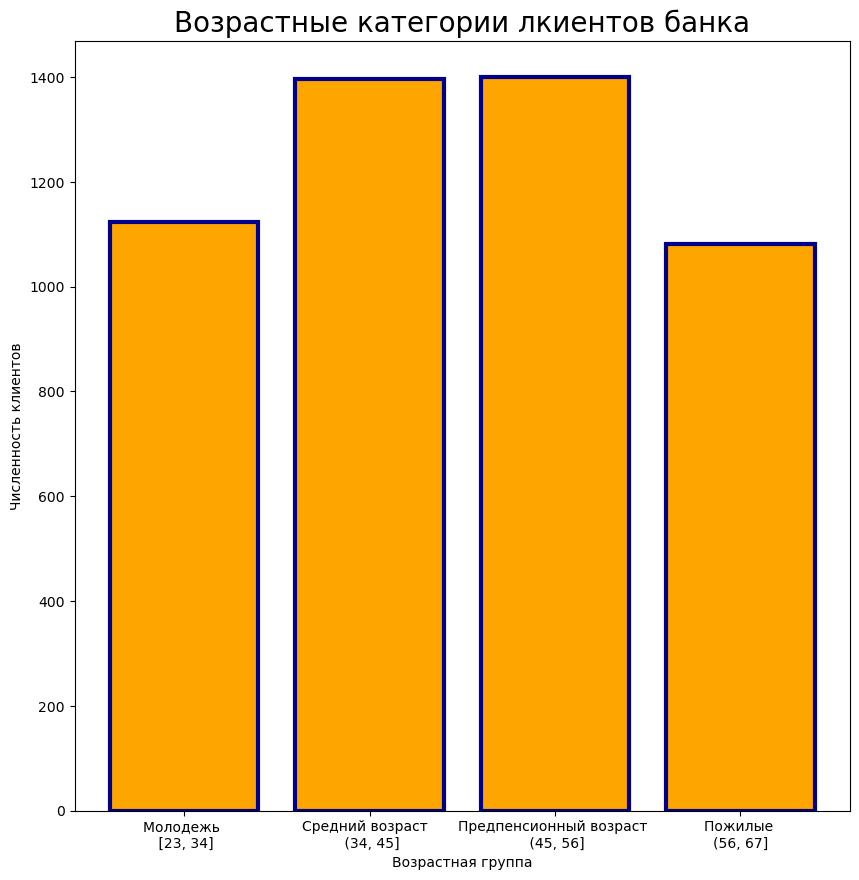

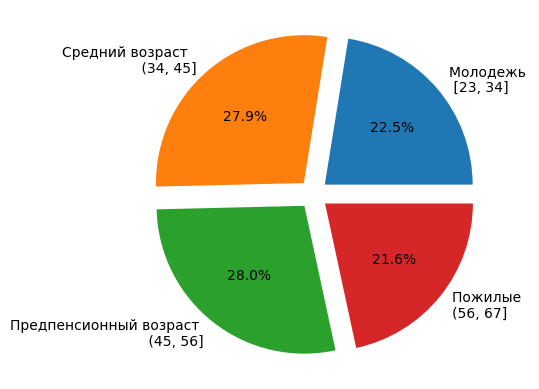

In [126]:
import matplotlib.pyplot as plt

# гистограмма 
plt.figure(figsize=(10,10))

y = [ 'Молодежь \n [23, 34]','Средний возраст  \n (34, 45]', 'Предпенсионный возраст \n (45, 56]', 'Пожилые \n(56, 67]']
x = age_groups['Age']

plt.bar(y, 
        x, 
        color='orange',
        edgecolor='darkblue', 
        linewidth=3)

plt.title("Возрастные категории лкиентов банка", 
          fontsize=20) # Заголовок
plt.xlabel("Возрастная группа") # Подпись оси Х
plt.ylabel("Численность клиентов") # Подпись оси Y

# круговая диаграмма 

fig, ax = plt.subplots()

ax.pie(x, labels=y,explode = (0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%')

plt.show()

**Мы разделили на клиентов банка на 4 возрастные группы**

Молодежь - [23, 34] - 1123 (22,5% от общей численности клиентов банка)

Средний возраст - (34, 45] - 1396 (27,9% от общей численности клиентов банка)

Предпенсионный возраст - (45, 56] - 1400 (28% от общей численности клиентов банка)

Пожилые - (56, 67] - 1081 (21,6% от общей численности клиентов банка)

In [127]:
#Создадим столбец для со значениями возрастной группы для каждого клиента
AgeGroup = list(np.eye(len(universal_bank),1))

for i in range(1, len(universal_bank) + 1):
    if 23 <= universal_bank.Age[i] <= 34:
        AgeGroup[i-1] = "Молодежь [23, 34]"
    elif 34 < universal_bank.Age[i] <= 45:
        AgeGroup[i-1] = "Средний возраст - (34, 45]"
    elif 45 < universal_bank.Age[i] <= 56:
        AgeGroup[i-1] = "Предпенсионный возраст (45, 56]"
    else:
        AgeGroup[i-1] = "Пожилые (56, 67]"
universal_bank['AgeGroup'] = AgeGroup
universal_bank = universal_bank.reset_index()
universal_bank

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,AgeGroup
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,"Молодежь [23, 34]"
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,"Средний возраст - (34, 45]"
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,"Средний возраст - (34, 45]"
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,"Средний возраст - (34, 45]"
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,"Средний возраст - (34, 45]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,"Молодежь [23, 34]"
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,"Молодежь [23, 34]"
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,"Пожилые (56, 67]"
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,"Пожилые (56, 67]"


# Гипотеза 1. Продукт – мобильный банкинг. Среди какого возраста наибольший онлайн в мобильном банкинге? 
Online –  Age 

In [128]:
table1 = universal_bank.groupby(['AgeGroup','Online']).agg({'ID': 'count'})
table1

ID
AgeGroup                        Online     
Молодежь [23, 34]               0       450
                                1       673
Пожилые (56, 67]                0       417
                                1       664
Предпенсионный возраст (45, 56] 0       566
                                1       834
Средний возраст - (34, 45]      0       583
                                1       813

In [129]:
online1 = universal_bank[(universal_bank['Online']== 1) & (universal_bank['AgeGroup'] == 'Молодежь [23, 34]') ]['ID'].count()
online2 = universal_bank[(universal_bank['Online']== 1) & (universal_bank['AgeGroup'] == 'Средний возраст - (34, 45]') ]['ID'].count()
online3 = universal_bank[(universal_bank['Online']== 1) & (universal_bank['AgeGroup'] == 'Предпенсионный возраст (45, 56]') ]['ID'].count()
online4 = universal_bank[(universal_bank['Online']== 1) & (universal_bank['AgeGroup'] == 'Пожилые (56, 67]') ]['ID'].count()

online = [online1, online2, online3, online4]

offline1 = universal_bank[(universal_bank['Online']== 0) & (universal_bank['AgeGroup'] == 'Молодежь [23, 34]') ]['ID'].count()
offline2 = universal_bank[(universal_bank['Online']== 0) & (universal_bank['AgeGroup'] == 'Средний возраст - (34, 45]') ]['ID'].count()
offline3 = universal_bank[(universal_bank['Online']== 0) & (universal_bank['AgeGroup'] == 'Предпенсионный возраст (45, 56]') ]['ID'].count()
offline4 = universal_bank[(universal_bank['Online']== 0) & (universal_bank['AgeGroup'] == 'Пожилые (56, 67]') ]['ID'].count()

offline =[offline1, offline2, offline3, offline4]

online
offline

per_online = [round(online[i]/(online[i] + offline[i])*100,2) for i in range(len(online))]
per_online


MAXper = max(per_online)
MAX = online[per_online.index(MAXper)]

MAXonlineGroup = table1.loc[table1['ID'] == MAX]
print(MAXonlineGroup)
print(MAXper)


                          ID
AgeGroup         Online     
Пожилые (56, 67] 1       664
61.42


<Figure size 1000x1000 with 0 Axes>

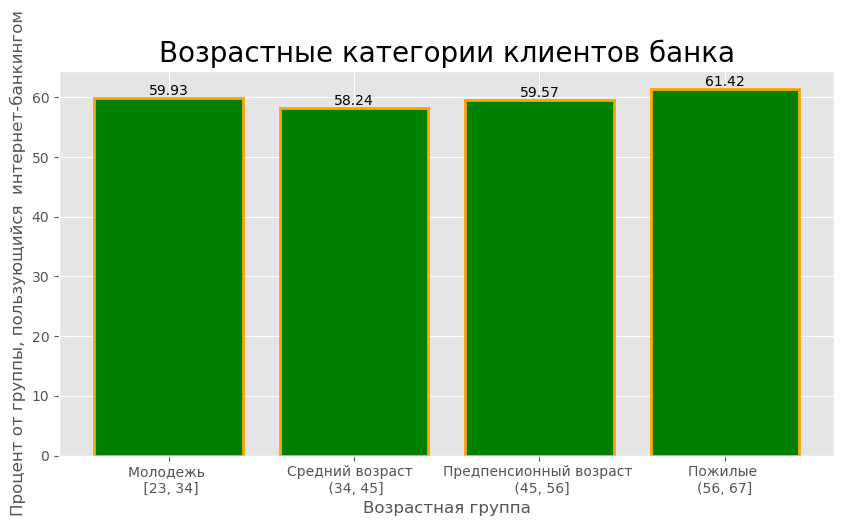

In [214]:
# гистограмма 
plt.figure(figsize=(10,10))

y = [ 'Молодежь \n [23, 34]','Средний возраст  \n (34, 45]', 'Предпенсионный возраст \n (45, 56]', 'Пожилые \n(56, 67]']
x = per_online


fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(y, 
        x, 
        color='green',
        edgecolor='orange', 
        linewidth=2)

plt.title("Возрастные категории клиентов банка", 
          fontsize=20) # Заголовок
plt.xlabel("Возрастная группа") # Подпись оси Х
plt.ylabel("Процент от группы, пользующийся  интернет-банкингом") # Подпись оси Y

# Подписи столбцов
for i, v in enumerate(per_online):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

# Реузльтат проверки гипотезы  1
Удельный вес пользователей интернет-банкинга в каждой из возрастных групп одинаковый в районе 60%.
Также стоит отметить, что наибольшей удельный вес пользователей интерент-банкинга у возрастной группы "Пожилые (56, 67]"


# Гипотеза №2
Продукт – услуги брокера/кастодиана. Наличие ценных бумаг среди клиентов разного возраста и уровня образования

Education, Age – Securities Account

In [131]:
# проанализируем зависимость: наличие брокерского счета в зависимсоти от возраста
table2 = universal_bank.groupby(['AgeGroup','Securities Account']).agg({'ID': 'count'})
table2
table2.style.set_table_attributes("style='display:inline'").set_caption('Таблицца зависимости:наличие брокерского счета в зависимсоти от возраста ')

In [132]:
# посчитаем удельные веса клиентов с открытыми брокерскрими счетами и без во всех возрастных группах
stocks1 = universal_bank[(universal_bank['Securities Account']== 1) & (universal_bank['AgeGroup'] == 'Молодежь [23, 34]') ]['ID'].count()
stocks2 = universal_bank[(universal_bank['Securities Account']== 1) & (universal_bank['AgeGroup'] == 'Средний возраст - (34, 45]') ]['ID'].count()
stocks3 = universal_bank[(universal_bank['Securities Account']== 1) & (universal_bank['AgeGroup'] == 'Предпенсионный возраст (45, 56]') ]['ID'].count()
stocks4 = universal_bank[(universal_bank['Securities Account']== 1) & (universal_bank['AgeGroup'] == 'Пожилые (56, 67]') ]['ID'].count()

stocks = [stocks1, stocks2, stocks3, stocks4]

nostocks1 = universal_bank[(universal_bank['Securities Account']== 0) & (universal_bank['AgeGroup'] == 'Молодежь [23, 34]') ]['ID'].count()
nostocks2 = universal_bank[(universal_bank['Securities Account']== 0) & (universal_bank['AgeGroup'] == 'Средний возраст - (34, 45]') ]['ID'].count()
nostocks3 = universal_bank[(universal_bank['Securities Account']== 0) & (universal_bank['AgeGroup'] == 'Предпенсионный возраст (45, 56]') ]['ID'].count()
nostocks4 = universal_bank[(universal_bank['Securities Account']== 0) & (universal_bank['AgeGroup'] == 'Пожилые (56, 67]') ]['ID'].count()

nostocks =[nostocks1, nostocks2, nostocks3, nostocks4]

stocks, nostocks

per_stocks = [round(stocks[i]/(stocks[i] + nostocks[i])*100,2) for i in range(len(stocks))]
per_stocks


MAXperstocks = max(per_stocks)
MAX = stocks[per_stocks.index(MAXperstocks)]

MAXstockGroup = table2.loc[table2['ID'] == MAX]
print(MAXstockGroup)
print('\n')
print(MAXperstocks)


                                                ID
AgeGroup                   Securities Account     
Средний возраст - (34, 45] 1                   161


11.53


<Figure size 1000x1000 with 0 Axes>

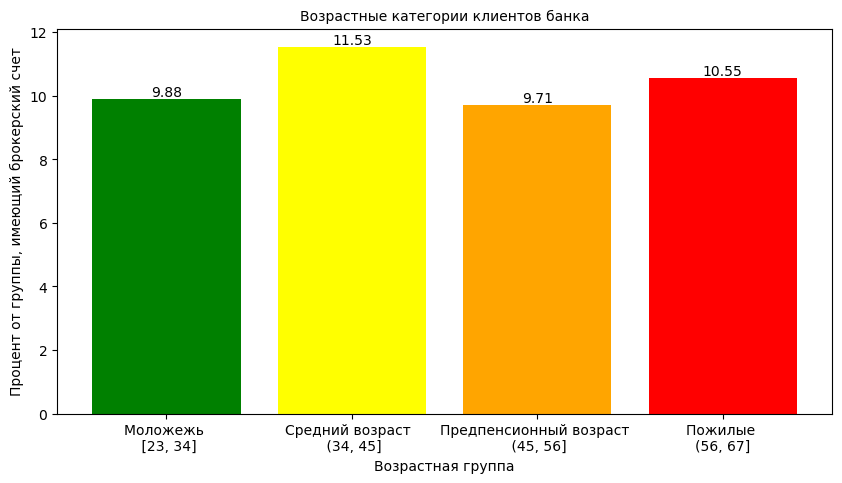

In [133]:
# гистограмма 
plt.figure(figsize=(10,10))

y = [ 'Моложежь \n [23, 34]','Средний возраст  \n (34, 45]', 'Предпенсионный возраст \n (45, 56]', 'Пожилые \n(56, 67]']
x = per_stocks

fig, ax = plt.subplots(figsize=(10, 5))
bar_colors = ['green', 'yellow', 'orange', 'red'] 
ax.bar(y, 
        x, 
        linewidth=2, color = bar_colors)
plt.title("Возрастные категории клиентов банка", 
          fontsize=10) # Заголовок
plt.xlabel("Возрастная группа") # Подпись оси Х
plt.ylabel("Процент от группы, имеющий брокерский счет") # Подпись оси Y

# Подписи столбцов
for i, v in enumerate(per_stocks):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

Удельный вес владельцев брокерского счета в каждой из возрастных групп находится в районе [ 9% - 12%]. 

Также стоит отметить, что наибольшей удельный вес владельцев брокерского счета находится у возрастной группы "Средний возраст (34, 45]"

In [134]:
# проанализируем зависимость: наличие брокерского счета в зависимсоти от уровня образования
table22 = universal_bank.groupby(['Education','Securities Account']).agg({'ID': 'count'})
table22
table22.style.set_table_attributes("style='display:inline'").set_caption('Таблицца зависимости:наличие брокерского счета в зависимсоти от уровня образования ')

In [135]:
# посчитаем удельные веса клиентов с открытыми брокерскрими счетами и без во всех группах
stocks11 = universal_bank[(universal_bank['Securities Account']== 1) & (universal_bank['Education'] == 1) ]['ID'].count()
stocks22 = universal_bank[(universal_bank['Securities Account']== 1) & (universal_bank['Education'] == 2) ]['ID'].count()
stocks33 = universal_bank[(universal_bank['Securities Account']== 1) & (universal_bank['Education'] == 3) ]['ID'].count()


stocks = [stocks11, stocks22, stocks33]

nostocks11 = universal_bank[(universal_bank['Securities Account']== 0) & (universal_bank['Education'] == 1) ]['ID'].count()
nostocks22 = universal_bank[(universal_bank['Securities Account']== 0) & (universal_bank['Education'] == 2) ]['ID'].count()
nostocks33 = universal_bank[(universal_bank['Securities Account']== 0) & (universal_bank['Education'] == 3) ]['ID'].count()

nostocks =[nostocks11, nostocks22, nostocks33]

stocks, nostocks

per_stocks = [round(stocks[i]/(stocks[i] + nostocks[i])*100,2) for i in range(len(stocks))]
per_stocks


MAXperstocks = max(per_stocks)
MAX = stocks[per_stocks.index(MAXperstocks)]

MAXstockGroup = table2.loc[table2['ID'] == MAX]
print(MAXstockGroup)
print('\n')
print(MAXperstocks)

Empty DataFrame
Columns: [ID]
Index: []


10.69


<Figure size 1000x1000 with 0 Axes>

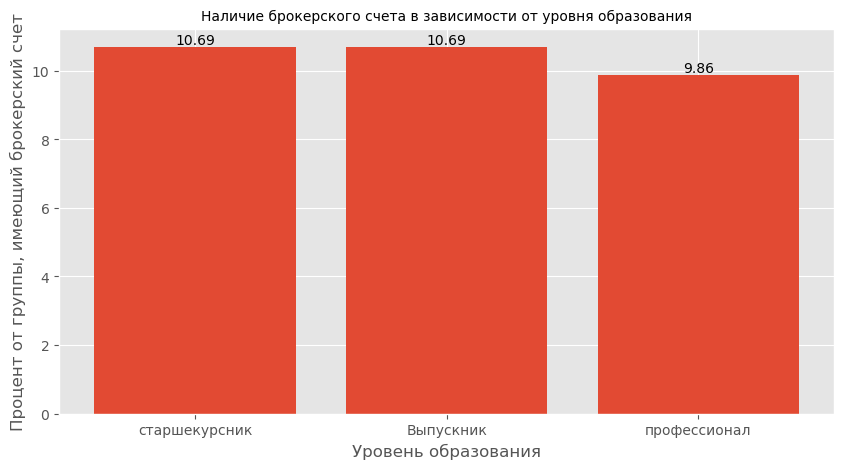

In [215]:
# гистограмма 
plt.figure(figsize=(10,10))

y = [ 'старшекурсник', 'Выпускник', 'профессионал']
x = per_stocks

fig, ax = plt.subplots(figsize=(10, 5))
 
ax.bar(y, 
        x, 
        linewidth=2)
plt.title("Наличие брокерского счета в зависимости от уровня образования", 
          fontsize=10) # Заголовок
plt.xlabel("Уровень образования") # Подпись оси Х
plt.ylabel("Процент от группы, имеющий брокерский счет") # Подпись оси Y

# Подписи столбцов
for i, v in enumerate(per_stocks):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

Удельный вес владельцев брокерского счета в каждой из возрастных групп находится в районе 10%.

Также стоит отметить, что наибольшей удельный вес владельцев брокерского счета находится у групп Старшекурсники и Выпускники

# Реузльтат проверки гипотезы 2
**Открытие брокерского счета в зависимости от возраста**

Удельный вес владельцев брокерского счета в каждой из возрастных групп находится в районе [ 9% - 12%].

Также стоит отметить, что наибольшей удельный вес владельцев брокерского счета находится у возрастной группы "Средний возраст (34, 45]"


**Открытие брокерского счета в зависимости от уровня образования**

Удельный вес владельцев брокерского счета в каждой из возрастных групп находится в районе 10%.
Также стоит отметить, что наибольшей удельный вес владельцев брокерского счета находится у групп Старшекурсники и Выпускники - 10.69%, в то время как у профессионалов 9.86% , что в свою очередь не является обыденным результатом, ведь чаще всего чем у человека выше уровень образовния тем больше он предрасположен к игре на фондовой бирже.

# Проверка гипотезы 3
Продукт – кредитная карта. Какая возрастная группа чаще использует кредитные карты?
Age, Income, Family – Credit Card

### Какая возрастная группа чаще использует кредитные карты?

In [137]:
# проанализируем зависимость: наличие брокерского счета в зависимсоти от возраста
table3 = universal_bank.groupby(['AgeGroup','CreditCard']).agg({'ID': 'count'})
table3
table3.style.set_table_attributes("style='display:inline'").set_caption('Таблицца зависимости:кредитной карты в зависимсоти от возраста ')

In [138]:
# посчитаем удельные веса клиентов с кредитными картами и без во всех возрастных группах
creditcard1 = universal_bank[(universal_bank['CreditCard']== 1) & (universal_bank['AgeGroup'] == 'Молодежь [23, 34]') ]['ID'].count()
creditcard2 = universal_bank[(universal_bank['CreditCard']== 1) & (universal_bank['AgeGroup'] == 'Средний возраст - (34, 45]') ]['ID'].count()
creditcard3 = universal_bank[(universal_bank['CreditCard']== 1) & (universal_bank['AgeGroup'] == 'Предпенсионный возраст (45, 56]') ]['ID'].count()
creditcard4 = universal_bank[(universal_bank['CreditCard']== 1) & (universal_bank['AgeGroup'] == 'Пожилые (56, 67]') ]['ID'].count()

creditcard = [creditcard1, creditcard2, creditcard3, creditcard4]

nocreditcard1 = universal_bank[(universal_bank['CreditCard']== 0) & (universal_bank['AgeGroup'] == 'Молодежь [23, 34]') ]['ID'].count()
nocreditcard2 = universal_bank[(universal_bank['CreditCard']== 0) & (universal_bank['AgeGroup'] == 'Средний возраст - (34, 45]') ]['ID'].count()
nocreditcard3 = universal_bank[(universal_bank['CreditCard']== 0) & (universal_bank['AgeGroup'] == 'Предпенсионный возраст (45, 56]') ]['ID'].count()
nocreditcard4 = universal_bank[(universal_bank['CreditCard']== 0) & (universal_bank['AgeGroup'] == 'Пожилые (56, 67]') ]['ID'].count()

nocreditcard =[nocreditcard1, nocreditcard2, nocreditcard3, nocreditcard4]

creditcard, nocreditcard

per_creditcard = [round(creditcard[i]/(creditcard[i] + nocreditcard[i])*100,2) for i in range(len(creditcard))]
per_creditcard


MAXpercreditcard = max(per_creditcard)
MAX = stocks[per_creditcard.index(MAXpercreditcard)]

MAXcreditcardGroup = table3.loc[table3['ID'] == MAX]
print(MAXcreditcardGroup)
print('\n')
print(MAXpercreditcard)

Empty DataFrame
Columns: [ID]
Index: []


30.07


<Figure size 1000x1000 with 0 Axes>

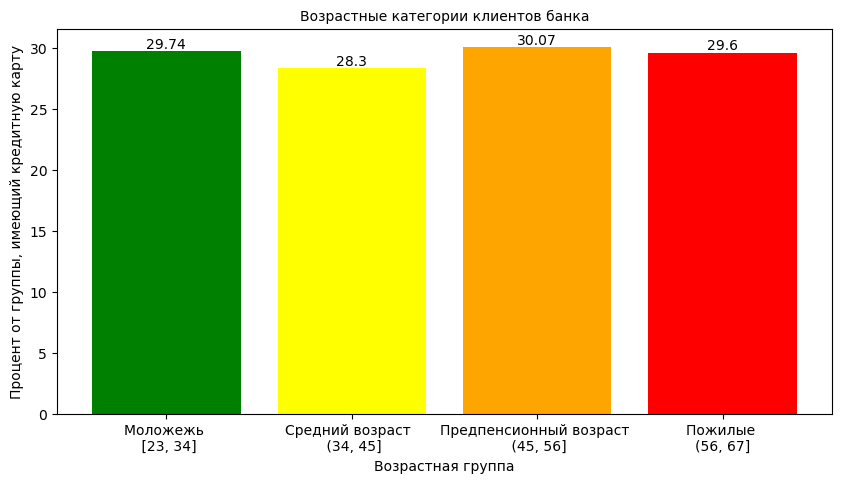

In [139]:
# гистограмма 
plt.figure(figsize=(10,10))

y = [ 'Моложежь \n [23, 34]','Средний возраст  \n (34, 45]', 'Предпенсионный возраст \n (45, 56]', 'Пожилые \n(56, 67]']
x = per_creditcard

fig, ax = plt.subplots(figsize=(10, 5))
bar_colors = ['green', 'yellow', 'orange', 'red'] 
ax.bar(y, 
        x, 
        linewidth=2, color = bar_colors)
plt.title("Возрастные категории клиентов банка", 
          fontsize=10) # Заголовок
plt.xlabel("Возрастная группа") # Подпись оси Х
plt.ylabel("Процент от группы, имеющий кредитную карту") # Подпись оси Y

# Подписи столбцов
for i, v in enumerate(per_creditcard):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

### Люди с каким уровнем образования чаще всего используют кредитные карты?

Все возрастные категорие клиентов имеют одинаковый процент пользователь кредитный карт: 24% - 25%

In [140]:
# проанализируем зависимость: наличие кредитной карты в зависимсоти от размера семьи
table32 = universal_bank.groupby(['Family','CreditCard']).agg({'ID': 'count'})
table32
table32.style.set_table_attributes("style='display:inline'").set_caption('Таблицца зависимости:наличие кредитной карты в зависимсоти от возраста ')

Empty DataFrame
Columns: [ID]
Index: []


31.1


<Figure size 1000x1000 with 0 Axes>

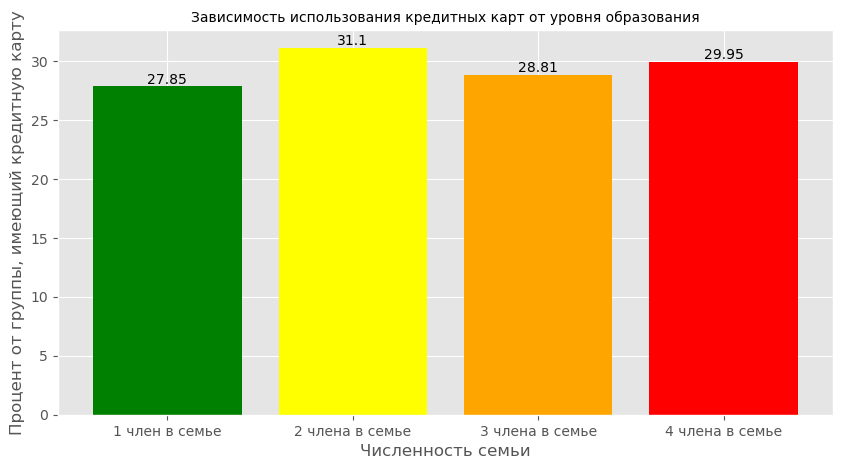

In [216]:
# посчитаем удельные веса клиентов с кредитными картами и без во всех группах
creditcard1 = universal_bank[(universal_bank['CreditCard']== 1) & (universal_bank['Family'] == 1) ]['ID'].count()
creditcard2 = universal_bank[(universal_bank['CreditCard']== 1) & (universal_bank['Family'] == 2) ]['ID'].count()
creditcard3 = universal_bank[(universal_bank['CreditCard']== 1) & (universal_bank['Family'] == 3) ]['ID'].count()
creditcard4 = universal_bank[(universal_bank['CreditCard']== 1) & (universal_bank['Family'] == 4) ]['ID'].count()

creditcard = [creditcard1, creditcard2, creditcard3, creditcard4]

nocreditcard1 = universal_bank[(universal_bank['CreditCard']== 0) & (universal_bank['Family'] == 1) ]['ID'].count()
nocreditcard2 = universal_bank[(universal_bank['CreditCard']== 0) & (universal_bank['Family'] == 2) ]['ID'].count()
nocreditcard3 = universal_bank[(universal_bank['CreditCard']== 0) & (universal_bank['Family'] == 3) ]['ID'].count()
nocreditcard4 = universal_bank[(universal_bank['CreditCard']== 0) & (universal_bank['Family'] == 4) ]['ID'].count()

nocreditcard =[nocreditcard1, nocreditcard2 , nocreditcard3, nocreditcard4 ]

creditcard, nocreditcard

per_creditcard = [round(creditcard[i]/(creditcard[i] + nocreditcard[i])*100,2) for i in range(len(creditcard))]
per_creditcard


MAXpercreditcard = max(per_creditcard)
MAX = creditcard[per_creditcard.index(MAXpercreditcard)]

MAXcreditcardGroup = table3.loc[table3['ID'] == MAX]
print(MAXcreditcardGroup)
print('\n')
print(MAXpercreditcard)


# гистограмма 
plt.figure(figsize=(10,10))

y = [ '1 член в семье', '2 члена в семье', '3 члена в семье', '4 члена в семье']
x = per_creditcard

fig, ax = plt.subplots(figsize=(10, 5))
bar_colors = ['green', 'yellow', 'orange', 'red'] 
ax.bar(y, 
        x, 
        linewidth=2, color = bar_colors)
plt.title("Зависимость использования кредитных карт от уровня образования", 
          fontsize=10) # Заголовок
plt.xlabel("Численность семьи") # Подпись оси Х
plt.ylabel("Процент от группы, имеющий кредитную карту") # Подпись оси Y

# Подписи столбцов
for i, v in enumerate(per_creditcard):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

По результатам анализа видно, что клиенты, которые живут одни ( 1 член в семье) меньше пользуются кредитными картами относительно остальных - 27.85%

На первом месте по частоте использования находится группа клиентов с 2 членами в семье, 31.1%

Также стоить заметить,  что на втором месте по частоте использования кредитных карт идет группа клиент с самой большой семьей -- 4 человека, 29.95%
Исходя из того, что состав семьи из 4 человек это зачастью (папа, мама + 2 ребенка), можно преположить, что такие семьи часто сталкиваются с дополнительными расходами на детские нужды, такие как одежда, обувь, игрушки, учебные материалы, развлечения и т.д. Кроме того, семьи с детьми могут иметь более высокие расходы на питание и жилищные услуги. В связи с этим, кредитные карты могут представлять для семей с детьми удобный способ покупки необходимых товаров и услуг в течение месяца, а не только при получении зарплаты.

### Люди с каким уровнем дохода чаще всего используют кредитные карты? 

In [145]:
# Раазделим клиентов банка по группам в зависимости от уровня дохода
universal_bank.Income.value_counts(bins=4)

(7.7829999999999995, 62.0]    2444
(62.0, 116.0]                 1634
(116.0, 170.0]                 673
(170.0, 224.0]                 249
Name: Income, dtype: int64

In [146]:
income_groups = pd.DataFrame(universal_bank.Income.value_counts(bins=4).sort_index(ascending=True))
income_groups.index_col = 'interval'
MIN = min(list(universal_bank.Income))
MAX = max(list(universal_bank.Income))
print('возратсные группы:\n', income_groups)
print('самая маленький доход:', MIN)
print('самый большой доход:', MAX)

возратсные группы:
                             Income
(7.7829999999999995, 62.0]    2444
(62.0, 116.0]                 1634
(116.0, 170.0]                 673
(170.0, 224.0]                 249
самая маленький доход: 8
самый большой доход: 224


**Мы разделили на клиентов банка на 4 группы в зависимости от уровня дохода** 

Малообеспеченные -               [8, 62]    - 2444

Среднеобеспеченные -        (62, 116]     - 1396

Высокообеспеченные - (116, 170]     - 1400

Богатые  -               (170, 224]   -   1081

In [147]:
# датафрейм для разделения по группам
income_gr =pd.DataFrame({'Group': ["Малообеспеченные", "Среднеобеспеченные", "Высокообеспеченные", "Богатые"], "Income": ["[8, 62]", "(62, 116]", "(116, 170]", "(170, 224]"],"Count": list(income_groups['Income']) })
income_gr

,Group,Income,Count
0,Малообеспеченные,"[8, 62]",2444
1,Среднеобеспеченные,"(62, 116]",1634
2,Высокообеспеченные,"(116, 170]",673
3,Богатые,"(170, 224]",249


<Figure size 1000x1000 with 0 Axes>

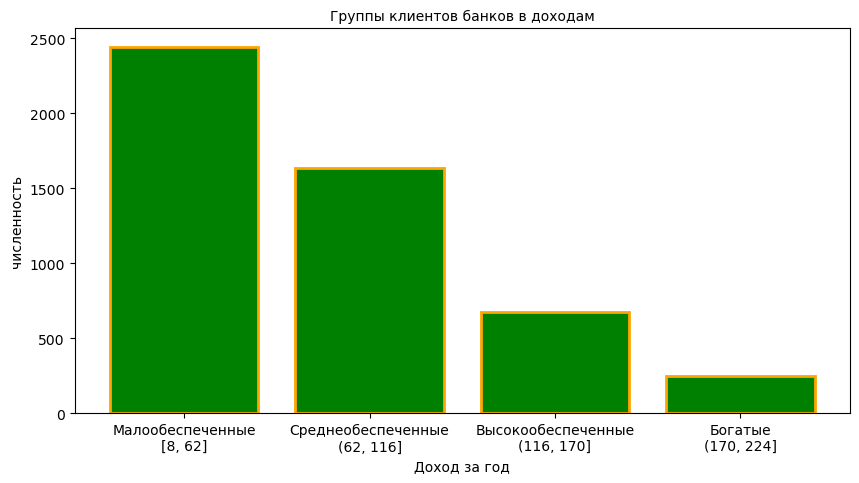

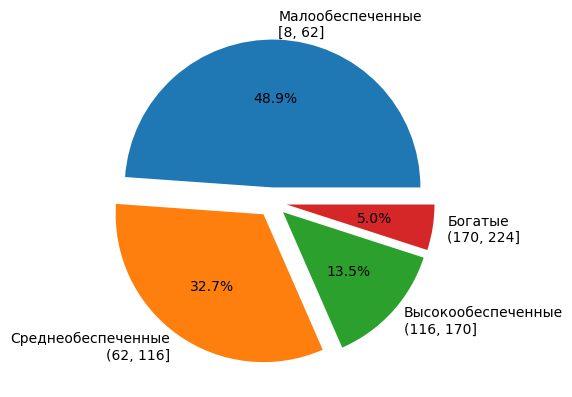

In [148]:
import matplotlib.pyplot as plt

# гистограмма 
plt.figure(figsize=(10,10))

y = ["Малообеспеченные\n[8, 62]", "Среднеобеспеченные\n(62, 116]", "Высокообеспеченные\n(116, 170]", "Богатые\n(170, 224]"]
x = income_groups['Income']

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(y, 
        x, 
        color='green',
        edgecolor='orange', 
        linewidth=2)

plt.title("Группы клиентов банков в доходам", 
          fontsize=10) # Заголовок
plt.xlabel("Доход за год") # Подпись оси Х
plt.ylabel("численность") # Подпись оси Y



fig, ax = plt.subplots()

ax.pie(x, labels=y,explode = (0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%')

plt.show()

Мы разделили на клиентов банка на 4 группы в зависимости от уровня дохода

Малообеспеченные - [8, 62] - 2444 (48,9%)

Среднеобеспеченные - (62, 116] - 1396 ( 32,7%)

Высокообеспеченные - (116, 170] - 1400 (13,5%)

Богатые - (170, 224] - 108 (5%)

In [149]:
#Создадим столбец для со значениями возрастной группы для каждого клиента
incomeGroup = list(np.eye(len(universal_bank),1))

for i in range(0, len(universal_bank)):
    if 8 <= universal_bank.Income[i] <= 62:
        incomeGroup[i] = "Малообеспеченные - [8, 62]"
    elif 62 < universal_bank.Income[i] <= 116:
        incomeGroup[i] = "Среднеобеспеченные - (62, 116]"
    elif 116 < universal_bank.Income[i] <= 170:
        incomeGroup[i] = "Высокообеспеченные - (116, 170]"
    else:
        incomeGroup[i] = "Богатые - (170, 224]"
universal_bank['incomeGroup'] = incomeGroup
universal_bank = universal_bank.reset_index()
universal_bank

,index,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,AgeGroup,incomeGroup
0,0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,"Молодежь [23, 34]","Малообеспеченные - [8, 62]"
1,1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,"Средний возраст - (34, 45]","Малообеспеченные - [8, 62]"
2,2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,"Средний возраст - (34, 45]","Малообеспеченные - [8, 62]"
3,3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,"Средний возраст - (34, 45]","Среднеобеспеченные - (62, 116]"
4,4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,"Средний возраст - (34, 45]","Малообеспеченные - [8, 62]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,"Молодежь [23, 34]","Малообеспеченные - [8, 62]"
4996,4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,"Молодежь [23, 34]","Малообеспеченные - [8, 62]"
4997,4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,"Пожилые (56, 67]","Малообеспеченные - [8, 62]"
4998,4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,"Пожилые (56, 67]","Малообеспеченные - [8, 62]"


In [151]:
# проанализируем зависимость: наличие кредитной карты в зависимсоти от размера семьи
table33 = universal_bank.groupby(['incomeGroup','CreditCard']).agg({'ID': 'count'})
table33
table33.style.set_table_attributes("style='display:inline'").set_caption('Таблицца зависимости:наличие кредитной карты в зависимости от уровня дохода ')

<Figure size 1000x1000 with 0 Axes>

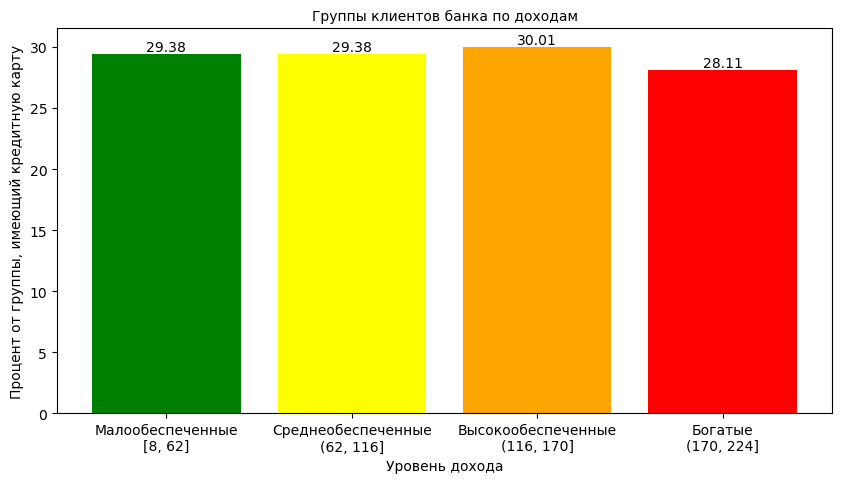

In [154]:
# посчитаем удельные веса клиентов с кредитными картами и без во всех группах
creditcard1 = universal_bank[(universal_bank['CreditCard']== 1) & (universal_bank['incomeGroup'] == 'Малообеспеченные - [8, 62]') ]['ID'].count()
creditcard2 = universal_bank[(universal_bank['CreditCard']== 1) & (universal_bank['incomeGroup'] == 'Среднеобеспеченные - (62, 116]') ]['ID'].count()
creditcard3 = universal_bank[(universal_bank['CreditCard']== 1) & (universal_bank['incomeGroup'] == 'Высокообеспеченные - (116, 170]') ]['ID'].count()
creditcard4 = universal_bank[(universal_bank['CreditCard']== 1) & (universal_bank['incomeGroup'] == 'Богатые - (170, 224]') ]['ID'].count()

creditcard = [creditcard1, creditcard2, creditcard3, creditcard4]

nocreditcard1 = universal_bank[(universal_bank['CreditCard']== 0) & (universal_bank['incomeGroup'] == 'Малообеспеченные - [8, 62]') ]['ID'].count()
nocreditcard2 = universal_bank[(universal_bank['CreditCard']== 0) & (universal_bank['incomeGroup'] == 'Среднеобеспеченные - (62, 116]') ]['ID'].count()
nocreditcard3 = universal_bank[(universal_bank['CreditCard']== 0) & (universal_bank['incomeGroup'] == 'Высокообеспеченные - (116, 170]') ]['ID'].count()
nocreditcard4 = universal_bank[(universal_bank['CreditCard']== 0) & (universal_bank['incomeGroup'] == 'Богатые - (170, 224]') ]['ID'].count()

nocreditcard =[nocreditcard1, nocreditcard2, nocreditcard3, nocreditcard4]

creditcard, nocreditcard

per_creditcard = [round(creditcard[i]/(creditcard[i] + nocreditcard[i])*100,2) for i in range(len(creditcard))]
per_creditcard


MAXpercreditcard = max(per_creditcard)
MAX = creditcard[per_creditcard.index(MAXpercreditcard)]


# гистограмма 
plt.figure(figsize=(10,10))

y = [ "Малообеспеченные\n[8, 62]", "Среднеобеспеченные\n(62, 116]", "Высокообеспеченные\n(116, 170]", "Богатые\n(170, 224]"]
x = per_creditcard

fig, ax = plt.subplots(figsize=(10, 5))
bar_colors = ['green', 'yellow', 'orange', 'red'] 
ax.bar(y, 
        x, 
        linewidth=2, color = bar_colors)
plt.title("Группы клиентов банка по доходам", 
          fontsize=10) # Заголовок
plt.xlabel("Уровень дохода") # Подпись оси Х
plt.ylabel("Процент от группы, имеющий кредитную карту") # Подпись оси Y

# Подписи столбцов
for i, v in enumerate(per_creditcard):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

# Результаты проверки гпиотезы 3 
### Зависимость наличия кредитной карты от возрастной группы 
Анализ показал, что во всех возратсных группах процент испоьзования кредитных карт составил 28% - 31%

Чаще всех карты использует группа предпенсионного возраста - 30.07%
### Зависимость наличия кредитной карты от количества людей в семье
По результатам анализа видно, что клиенты, которые живут одни ( 1 член в семье) меньше пользуются кредитными картами относительно остальных - 27.85%

На первом месте по частоте использования находится группа клиентов с 2 членами в семье, 31.1%

Также стоить заметить,  что на втором месте по частоте использования кредитных карт идет группа клиент с самой большой семьей -- 4 человека, 29.95%
Исходя из того, что состав семьи из 4 человек это зачастью (папа, мама + 2 ребенка), можно преположить, что такие семьи часто сталкиваются с дополнительными расходами на детские нужды, такие как одежда, обувь, игрушки, учебные материалы, развлечения и т.д. Кроме того, семьи с детьми могут иметь более высокие расходы на питание и жилищные услуги. В связи с этим, кредитные карты могут представлять для семей с детьми удобный способ покупки необходимых товаров и услуг в течение месяца, а не только при получении зарплаты.
### Зависимость наличия кредитной карты от уровня дохода
..Анализ показал, что во всех группах в зависимости от уровня дохода процент испоьзования кредитных карт составил 28% - 31%

Чаще всех карты использует группа высокообеспеченных клиентов - 30.01%

# Гипотеза 4
Анализ использования банковского продукта кредит. Какая возрастная группа в чаще берет кредит? 
Age, Income, Family – Personal loan

### Какая возрастная группа чаще берет кредит? 

In [156]:
# проанализируем зависимость: наличие кредита в зависимсоти от возрастной группы
table4 = universal_bank.groupby(['AgeGroup','Personal Loan']).agg({'ID': 'count'})
table4
table4.style.set_table_attributes("style='display:inline'").set_caption('Таблицца зависимости:наличие кредита в зависимости от возрастной группы ')

<Figure size 1000x1000 with 0 Axes>

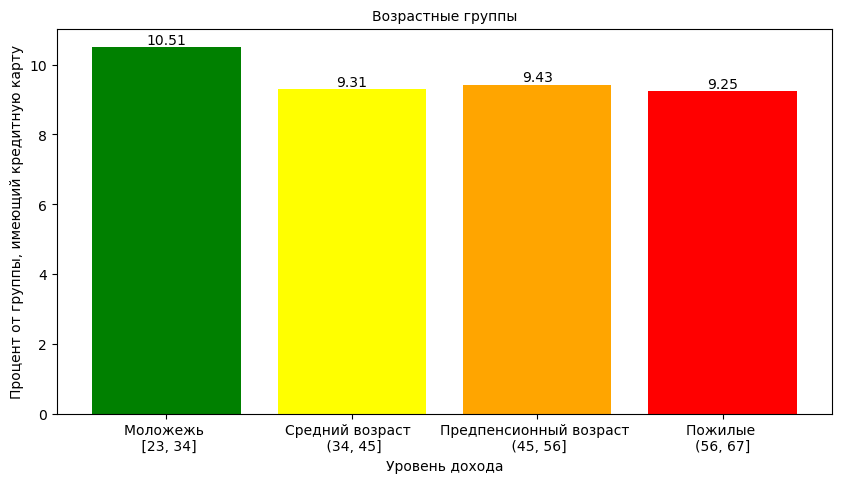

In [169]:
# посчитаем удельные веса клиентов с кредитами и без во всех группах
loan1 = universal_bank[(universal_bank['Personal Loan']== 1) & (universal_bank['AgeGroup'] == 'Молодежь [23, 34]') ]['ID'].count()
loan2 = universal_bank[(universal_bank['Personal Loan']== 1) & (universal_bank['AgeGroup'] == 'Средний возраст - (34, 45]') ]['ID'].count()
loan3 = universal_bank[(universal_bank['Personal Loan']== 1) & (universal_bank['AgeGroup'] == 'Предпенсионный возраст (45, 56]') ]['ID'].count()
loan4 = universal_bank[(universal_bank['Personal Loan']== 1) & (universal_bank['AgeGroup'] == 'Пожилые (56, 67]') ]['ID'].count()

loan = [loan1, loan2, loan3, loan4]

noloan1 = universal_bank[(universal_bank['Personal Loan']== 0) & (universal_bank['AgeGroup'] == 'Молодежь [23, 34]') ]['ID'].count()
noloan2 = universal_bank[(universal_bank['Personal Loan']== 0) & (universal_bank['AgeGroup'] == 'Средний возраст - (34, 45]') ]['ID'].count()
noloan3 = universal_bank[(universal_bank['Personal Loan']== 0) & (universal_bank['AgeGroup'] == 'Предпенсионный возраст (45, 56]') ]['ID'].count()
noloan4 = universal_bank[(universal_bank['Personal Loan']== 0) & (universal_bank['AgeGroup'] == 'Пожилые (56, 67]') ]['ID'].count()

noloan =[noloan1, noloan2, noloan3, noloan4]

loan, noloan

per_loan = [round(loan[i]/(loan[i] + noloan[i])*100,2) for i in range(len(loan))]


MAXperloan = max(per_loan)
MAX = loan[per_loan.index(MAXperloan)]


# гистограмма 
plt.figure(figsize=(10,10))

y = [ 'Моложежь \n [23, 34]','Средний возраст  \n (34, 45]', 'Предпенсионный возраст \n (45, 56]', 'Пожилые \n(56, 67]']
x = per_loan

fig, ax = plt.subplots(figsize=(10, 5))
bar_colors = ['green', 'yellow', 'orange', 'red'] 
ax.bar(y, 
        x, 
        linewidth=2, color = bar_colors)
plt.title("Возрастные группы", 
          fontsize=10) # Заголовок
plt.xlabel("Уровень дохода") # Подпись оси Х
plt.ylabel("Процент от группы, имеющий кредитную карту") # Подпись оси Y

# Подписи столбцов
for i, v in enumerate(per_loan):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

Результаты анализа показили, что взрастной группой, которая чаще остальных прибегала к использованию  кредит в ходе предыдущей кредитной кампании, стала Молодежь - 10.51%.

Это обусловлено тем, что у молодых людей меньше накоплений и опыта в управлении своим бюджетом, а также они только начинают свою карьеру и не имеют достаточного дохода. Кредиты могут помочь им покрыть расходы на жилье, транспорт, образование и другие нужды. 


### Какие клиенты в зависимости от уровня дохода чаще всего берут кредит? 

In [168]:
# проанализируем зависимость: наличие кредита в зависимсоти от уровня дохода
table4 = universal_bank.groupby(['incomeGroup','Personal Loan']).agg({'ID': 'count'})
table4
table4.style.set_table_attributes("style='display:inline'").set_caption('Таблица зависимости:наличие кредита в зависимости от уровня дохода ')

<Figure size 1000x1000 with 0 Axes>

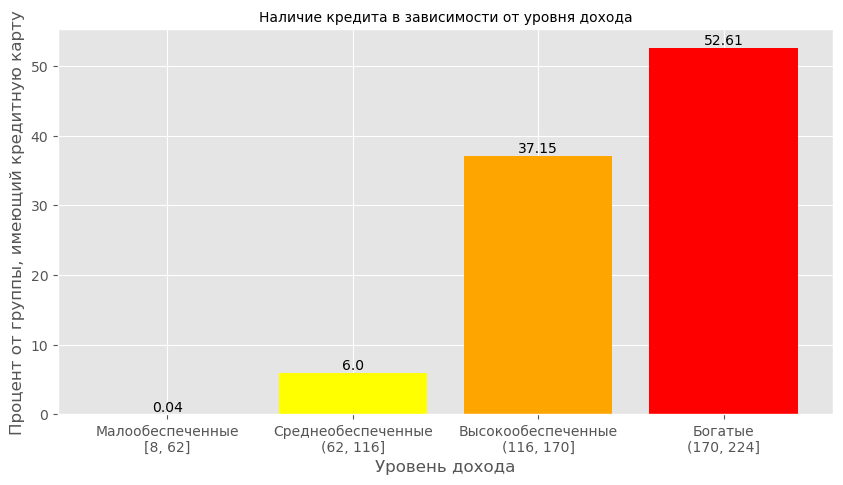

In [217]:
# посчитаем удельные веса клиентов с кредитаи и без во всех группах
loan1 = universal_bank[(universal_bank['Personal Loan']== 1) & (universal_bank['incomeGroup'] == 'Малообеспеченные - [8, 62]') ]['ID'].count()
loan2 = universal_bank[(universal_bank['Personal Loan']== 1) & (universal_bank['incomeGroup'] == 'Среднеобеспеченные - (62, 116]') ]['ID'].count()
loan3 = universal_bank[(universal_bank['Personal Loan']== 1) & (universal_bank['incomeGroup'] == 'Высокообеспеченные - (116, 170]') ]['ID'].count()
loan4 = universal_bank[(universal_bank['Personal Loan']== 1) & (universal_bank['incomeGroup'] == 'Богатые - (170, 224]') ]['ID'].count()

loan = [loan1, loan2, loan3, loan4]

noloan1 = universal_bank[(universal_bank['Personal Loan']== 0) & (universal_bank['incomeGroup'] == 'Малообеспеченные - [8, 62]') ]['ID'].count()
noloan2 = universal_bank[(universal_bank['Personal Loan']== 0) & (universal_bank['incomeGroup'] == 'Среднеобеспеченные - (62, 116]') ]['ID'].count()
noloan3 = universal_bank[(universal_bank['Personal Loan']== 0) & (universal_bank['incomeGroup'] == 'Высокообеспеченные - (116, 170]') ]['ID'].count()
noloan4 = universal_bank[(universal_bank['Personal Loan']== 0) & (universal_bank['incomeGroup'] == 'Богатые - (170, 224]') ]['ID'].count()

noloan =[noloan1, noloan2, noloan3, noloan4]

loan, noloan

per_loan = [round(loan[i]/(loan[i] + noloan[i])*100,2) for i in range(len(loan))]


MAXperloan = max(per_loan)
MAX = loan[per_loan.index(MAXperloan)]


# гистограмма 
plt.figure(figsize=(10,10))

y = [ "Малообеспеченные\n[8, 62]", "Среднеобеспеченные\n(62, 116]", "Высокообеспеченные\n(116, 170]", "Богатые\n(170, 224]"]
x = per_loan

fig, ax = plt.subplots(figsize=(10, 5))
bar_colors = ['green', 'yellow', 'orange', 'red'] 
ax.bar(y, 
        x, 
        linewidth=2, color = bar_colors)
plt.title("Наличие кредита в зависимости от уровня дохода", 
          fontsize=10) # Заголовок
plt.xlabel("Уровень дохода") # Подпись оси Х
plt.ylabel("Процент от группы, имеющий кредитную карту") # Подпись оси Y

# Подписи столбцов
for i, v in enumerate(per_loan):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

Как можно заметить, в течение прошлой кредитной кампании чаще всего кредит брали клиенты с высоким урвовнем дохода: Богатые - 52.61 , Выосокообеспеченные - 37.15%
Это может быть связано с тем, что для обеспеченных кредит является более доступным, ведь при выдаче кредита есть определьный ценз на уровень дохода, так как займ должен быть обеспеченным
Соответственно маркетинговая иди 'sales' кампания банка в рамках выдачи потребительских кредитов в первую оччередь должна быть нацелена на категории клиентов с выскоим доходом.

### Какие клиенты в зависимости от численности семьи чаще всего берут кредит?

In [183]:
# проанализируем зависимость: наличие кредита в зависимсоти от количества членов семьи 
table4 = universal_bank.groupby(['Family','Personal Loan']).agg({'ID': 'count'})
table4
table4.style.set_table_attributes("style='display:inline'").set_caption('Таблица зависимости:наличие кредита в зависимости от количества членов в семье')

<Figure size 1000x1000 with 0 Axes>

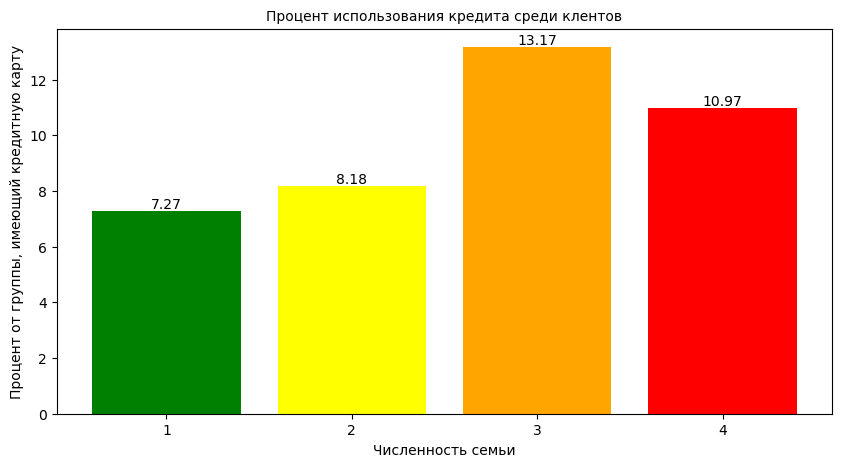

In [187]:
# посчитаем удельные веса клиентов с кредитами и без во всех группах
loan1 = universal_bank[(universal_bank['Personal Loan']== 1) & (universal_bank['Family'] == 1) ]['ID'].count()
loan2 = universal_bank[(universal_bank['Personal Loan']== 1) & (universal_bank['Family'] == 2) ]['ID'].count()
loan3 = universal_bank[(universal_bank['Personal Loan']== 1) & (universal_bank['Family'] == 3) ]['ID'].count()
loan4 = universal_bank[(universal_bank['Personal Loan']== 1) & (universal_bank['Family'] == 4) ]['ID'].count()

loan = [loan1, loan2, loan3, loan4]

noloan1 = universal_bank[(universal_bank['Personal Loan']== 0) & (universal_bank['Family'] == 1) ]['ID'].count()
noloan2 = universal_bank[(universal_bank['Personal Loan']== 0) & (universal_bank['Family'] == 2) ]['ID'].count()
noloan3 = universal_bank[(universal_bank['Personal Loan']== 0) & (universal_bank['Family'] == 3) ]['ID'].count()
noloan4 = universal_bank[(universal_bank['Personal Loan']== 0) & (universal_bank['Family'] == 4) ]['ID'].count()

noloan =[noloan1, noloan2, noloan3, noloan4]

loan, noloan

per_loan = [round(loan[i]/(loan[i] + noloan[i])*100,2) for i in range(len(loan))]


MAXperloan = max(per_loan)
MAX = loan[per_loan.index(MAXperloan)]


# гистограмма 
plt.figure(figsize=(10,10))

y = [ "1", "2", "3", "4"]
x = per_loan

fig, ax = plt.subplots(figsize=(10, 5))
bar_colors = ['green', 'yellow', 'orange', 'red'] 
ax.bar(y, 
        x, 
        linewidth=2, color = bar_colors)
plt.title("Процент использования кредита среди клентов", 
          fontsize=10) # Заголовок
plt.xlabel("Численность семьи") # Подпись оси Х
plt.ylabel("Процент от группы, имеющий кредитную карту") # Подпись оси Y

# Подписи столбцов
for i, v in enumerate(per_loan):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

Прослеживается тенденция: чем больше членов в семье, тем более востребован кредит.
Самы большой процент использования кредита у группы с 3 членами в семье - 13,17%.

Тем самым можно делать вывод о том ,что целевой аудиторией потребительских кредитов являются семьи с бОльшим числом членов, так как у них статьи расходов и потребонсти больше чем у других

# Частота использования банковских продуктов среди клиентов 

In [194]:
# посчитаем удельные веса клиентов с кредитами и без во всех группах
online = universal_bank[(universal_bank['Online']== 1) ]['ID'].count()
broker = universal_bank[(universal_bank['Securities Account']== 1)]['ID'].count()
creditcard = universal_bank[(universal_bank['CreditCard']== 1)]['ID'].count()
loan = universal_bank[(universal_bank['Personal Loan']== 1)]['ID'].count()
use = [online, broker, creditcard, loan]
per_use = [round(i/len(universal_bank)* 100,2) for i in use]
products = pd.DataFrame({'Products':['Интернет Банк','Брокерский счет', 'Кредитная карта', 'Кредит'], 'Use':use, '% of use': per_use})
products

,Products,Use,% of use
0,Интернет Банк,2984,59.68
1,Брокерский счет,522,10.44
2,Кредитная карта,1470,29.40
3,Кредит,480,9.60


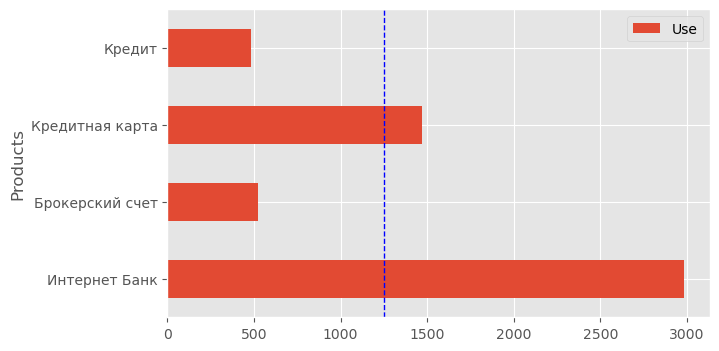

In [212]:
plt.style.use('ggplot')
fig,(ax0) = plt.subplots(nrows=1, sharey=True, figsize=(7, 4))

products.plot(kind='barh', y="Use", x="Products", ax=ax0)
ax.set(title='Популярность банковских прдуктов', xlabel='Количество клиентов-пользователей', ylabel='Банковский продукт')

#Линия 25% клиентов банка
avg = len(universal_bank)/4
ax0.axvline(x=avg, color='b', label='25%', linestyle='--', linewidth=1)

Самым популярным банковским продуктом является интерент-банк, им пользуется 59.8%.  На втором месте идеткредитная карта, ей пользуются 29.4% клиентов банка. Брокерский счет есть у 10.44% клиентов, а Потребительский кредит во время предыдущей капании взяли 9.6% 
Тем самым можно сделать вывод о том, что при формирование бренда банка нужно делать упор на развитие и рекламу кредитной карты и интернет-банка, так как они наиболее востребованы среди клиентов. 